<a href="https://colab.research.google.com/github/Devanshu0502/Churn-Prediction/blob/main/Churn_Modelling_using_Lucifer_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lucifer-ml mlfoundry servicefoundry gradio pydantic==1.10.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

## Importing LuciferML
from luciferml.supervised.classification import Classification


import os
os.environ["TFY_API_KEY"] = "<your-api_key-here>"
from servicefoundry import Build, PythonBuild, Service, Resources,DockerFileBuild
import mlfoundry
import servicefoundry.core as sfy

import warnings
warnings.simplefilter(action='ignore', category=Warning)

``multivariate`` option is an experimental feature. The interface can change in the future.


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Churn/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


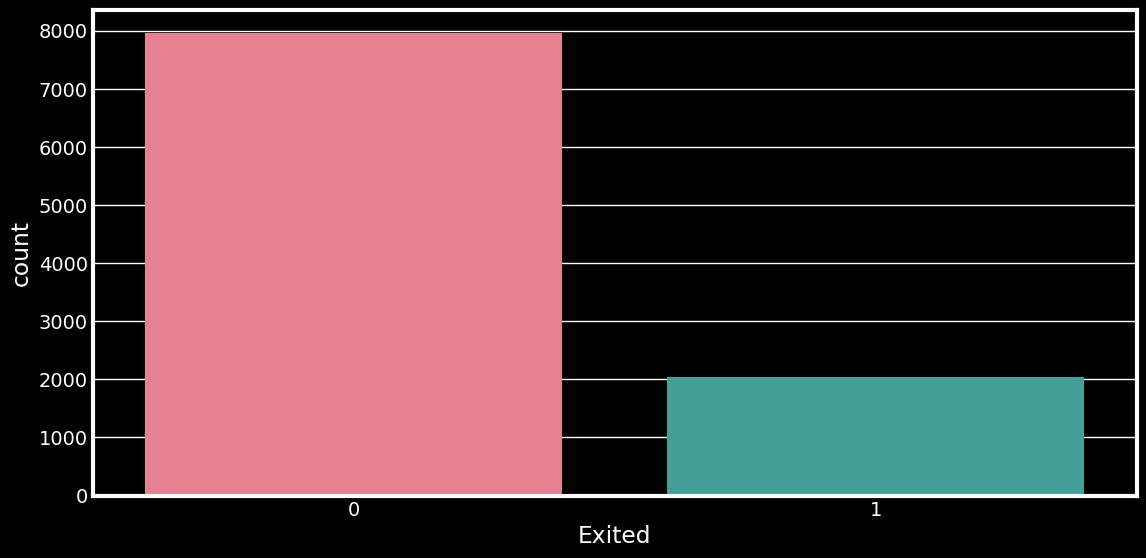

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Exited", data=df, palette='husl');

In [7]:
def boxPlotter(columnName):
        sns.catplot(x="Exited", y=columnName, data=df, kind="box");

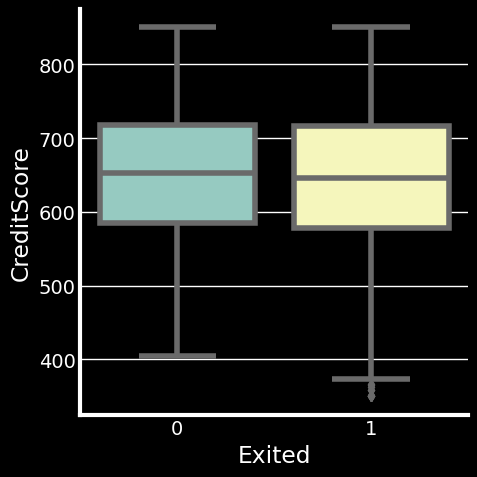

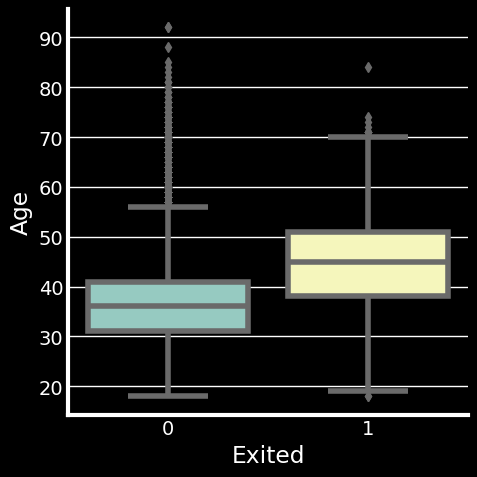

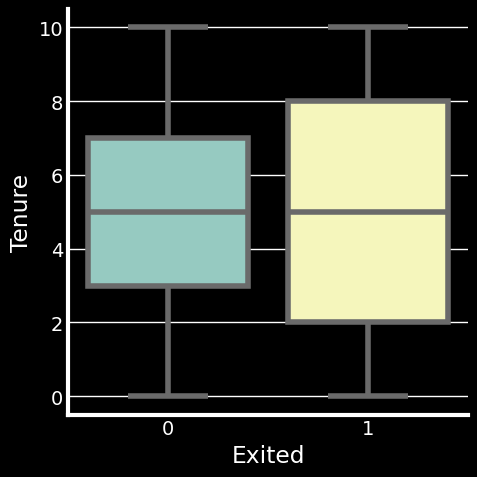

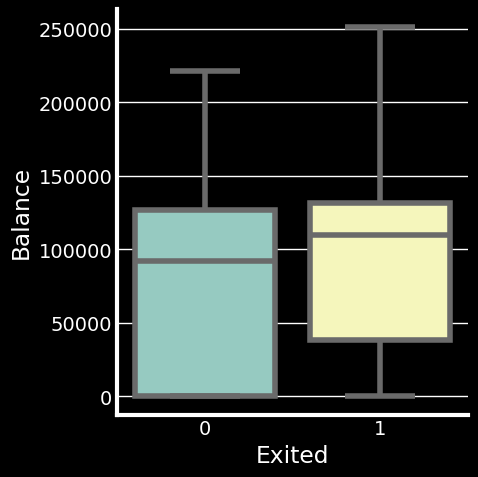

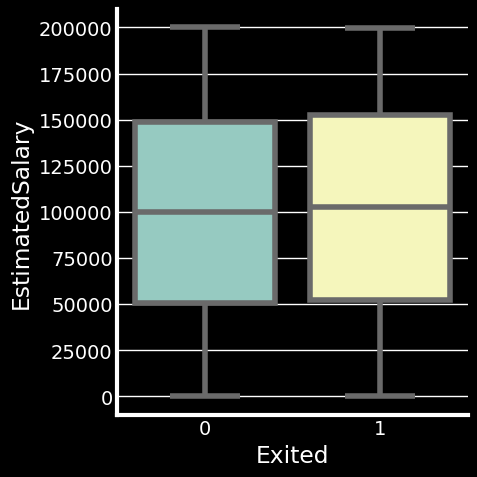

In [8]:
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for column in cols:
    boxPlotter(column)

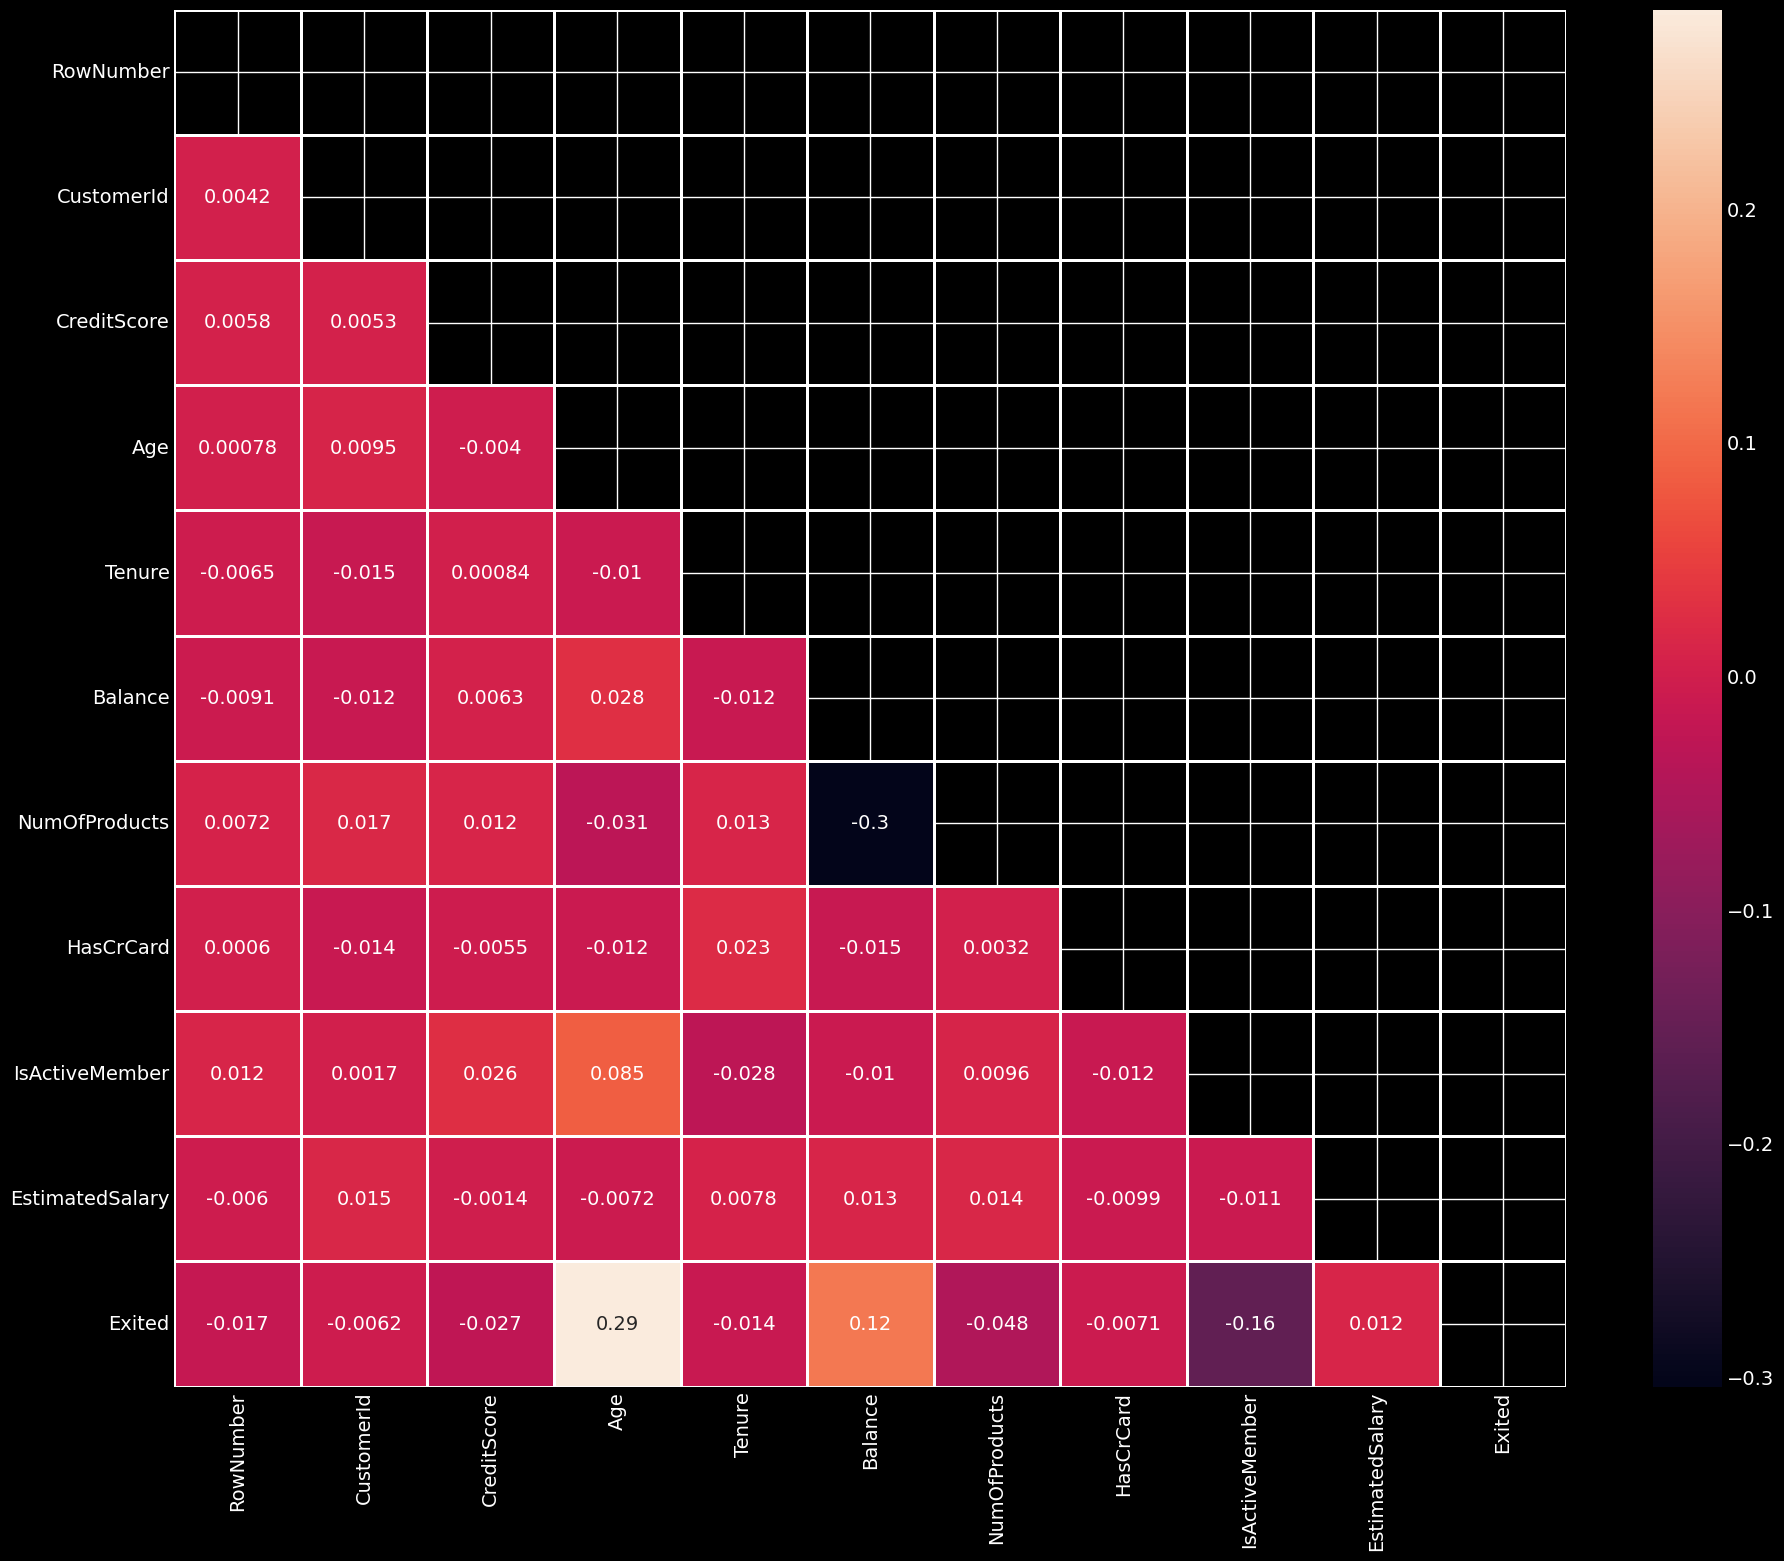

In [9]:
plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket");

In [10]:
plot_data =  df.drop(['RowNumber', 'CustomerId', 'Surname','Gender','NumOfProducts', 'HasCrCard','Geography',
       'IsActiveMember', ], axis=1)

In [11]:
def pieChartPlotter(df, columnName):
    values = df[columnName].value_counts()
    labels = df[columnName].unique()
    pie, ax = plt.subplots(figsize=[10, 6])

    patches, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.2f%%', shadow=True, pctdistance=.5,# explode=[0.06]*dataset['Exited'].unique()
                                       )

    plt.legend(patches, labels, loc="best")
    plt.title(columnName, color='white', fontsize=14)
    plt.setp(texts, color='white', fontsize=20)
    plt.setp(autotexts, size=10, color='black')
    autotexts[1].set_color('black')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

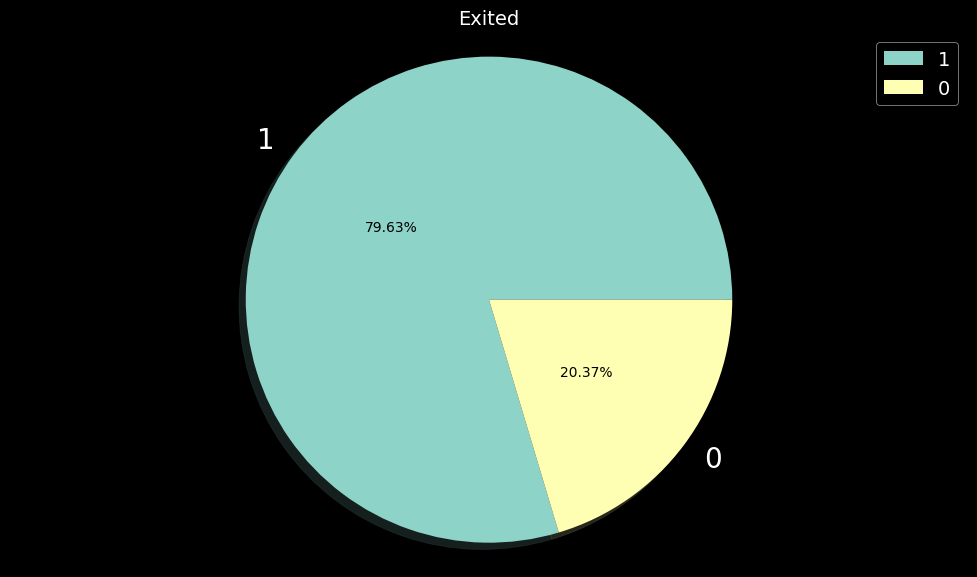

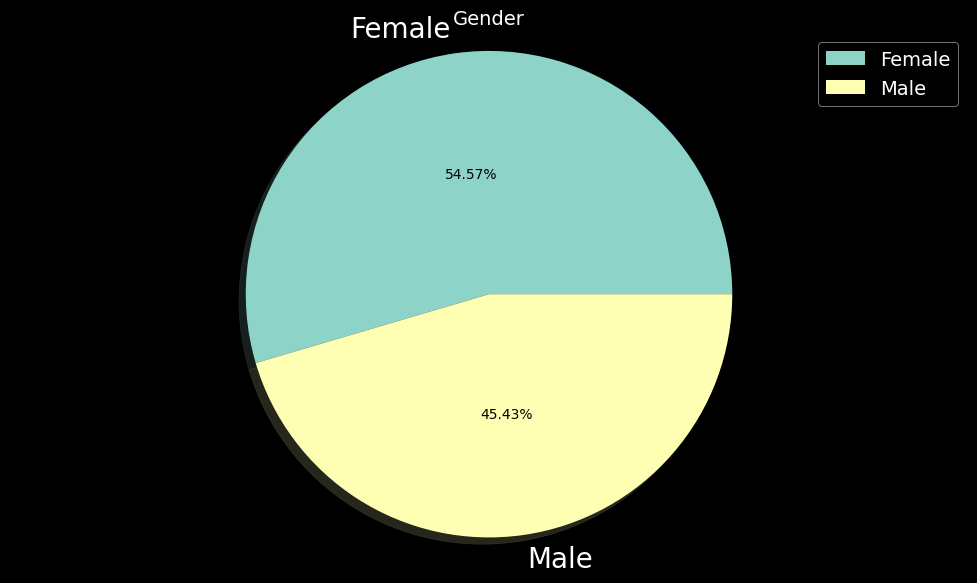

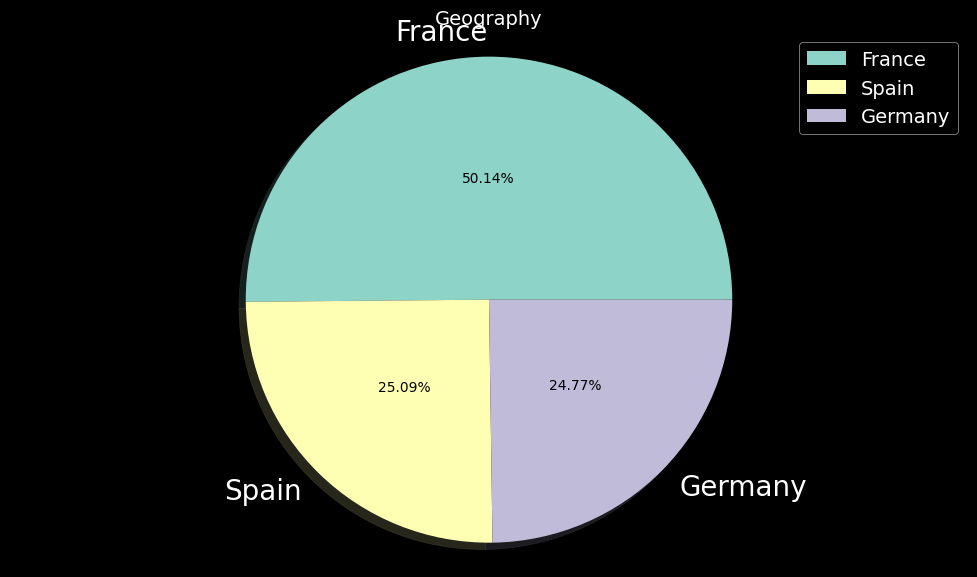

In [12]:
pieChartPlotter(df, 'Exited') 
pieChartPlotter(df, 'Gender')
pieChartPlotter(df, 'Geography')

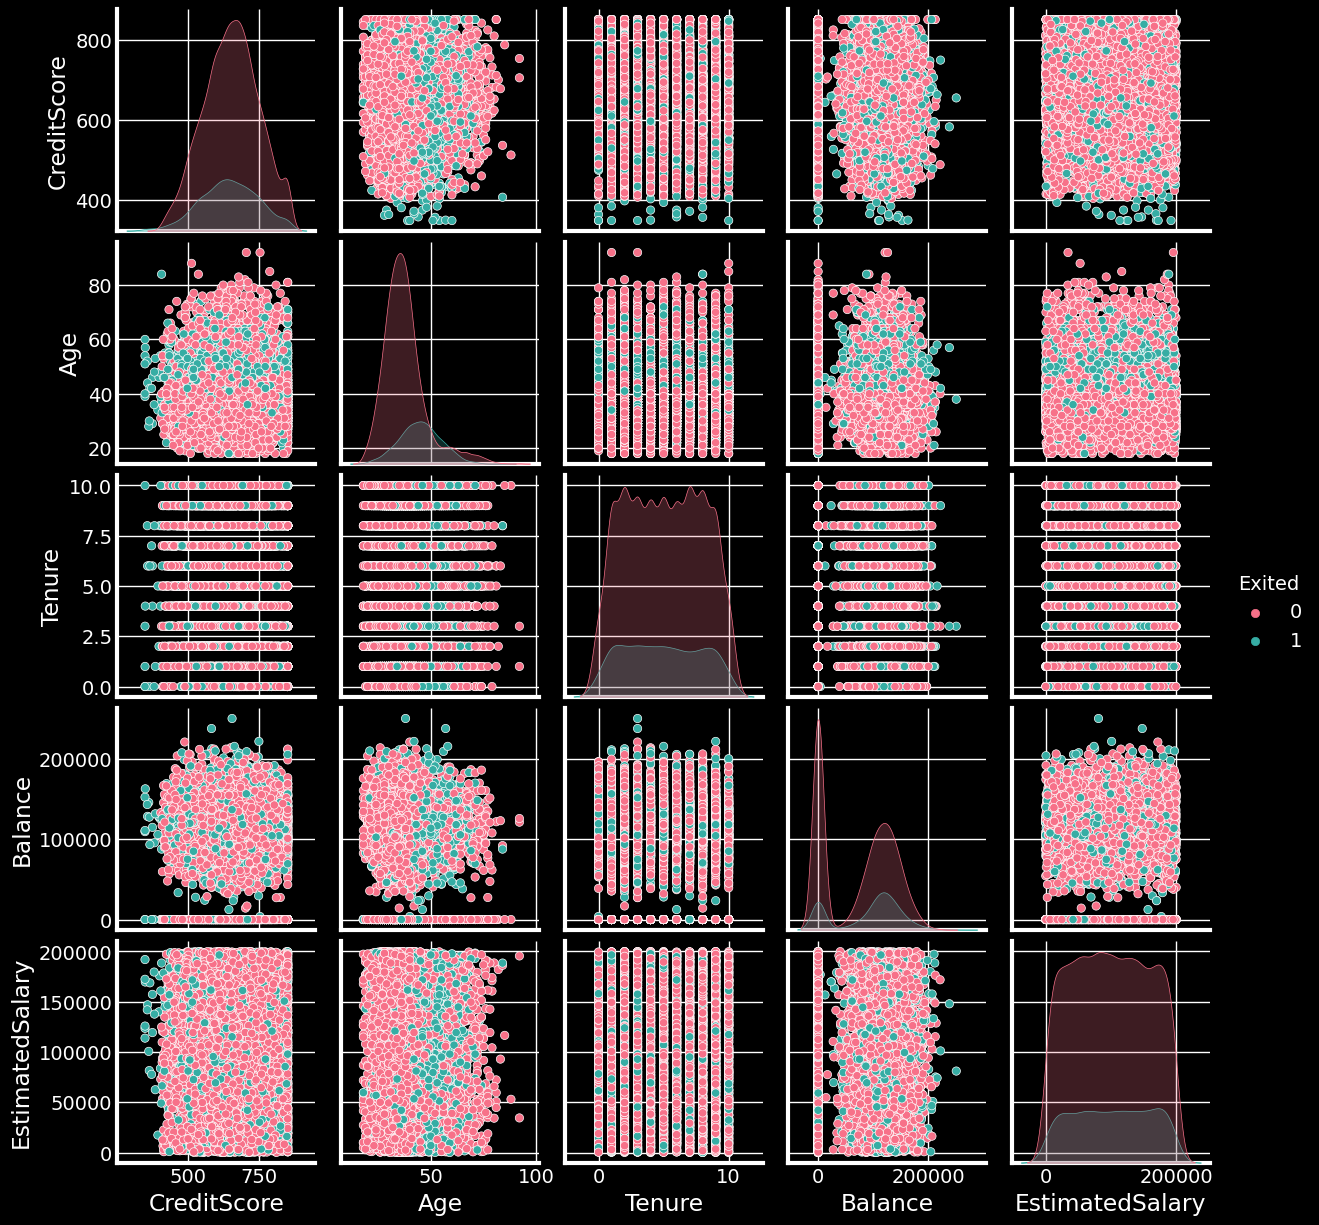

In [13]:
sns.pairplot(plot_data, hue="Exited", palette="husl");

In [14]:
def skewnessCorrector(df,columnName):
    import seaborn as sns
    from scipy import stats
    from scipy.stats import norm, boxcox
    """
    This function returns two plots distplot and probability plot for non-normalized data and after normalizing the provided data. 
    Just provide it with two parameters dataset and the name of column.
    It corrects the skewness of data applying Boxcox transformation on the provided data
    """
    print('''Before Correcting''')
    (mu, sigma) = norm.fit(df[columnName])
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(df[columnName], fit=norm, color="lightcoral");
    plt.title(columnName.capitalize() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(df[columnName], plot=plt)
    plt.show()
    # Applying BoxCox Transformation
    df[columnName], lam_fixed_acidity = boxcox(
        df[columnName])
    
    print('''After Correcting''')
    (mu, sigma) = norm.fit(df[columnName])
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.capitalize(), mu, columnName.capitalize(), sigma))
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    sns.distplot(df[columnName], fit=norm, color="orange");
    plt.title(columnName.capitalize() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1, 2, 2)
    stats.probplot(df[columnName], plot=plt)
    plt.show()

Before Correcting
Mu before correcting Creditscore : 650.5288, Sigma before correcting Creditscore : 96.64846595037089


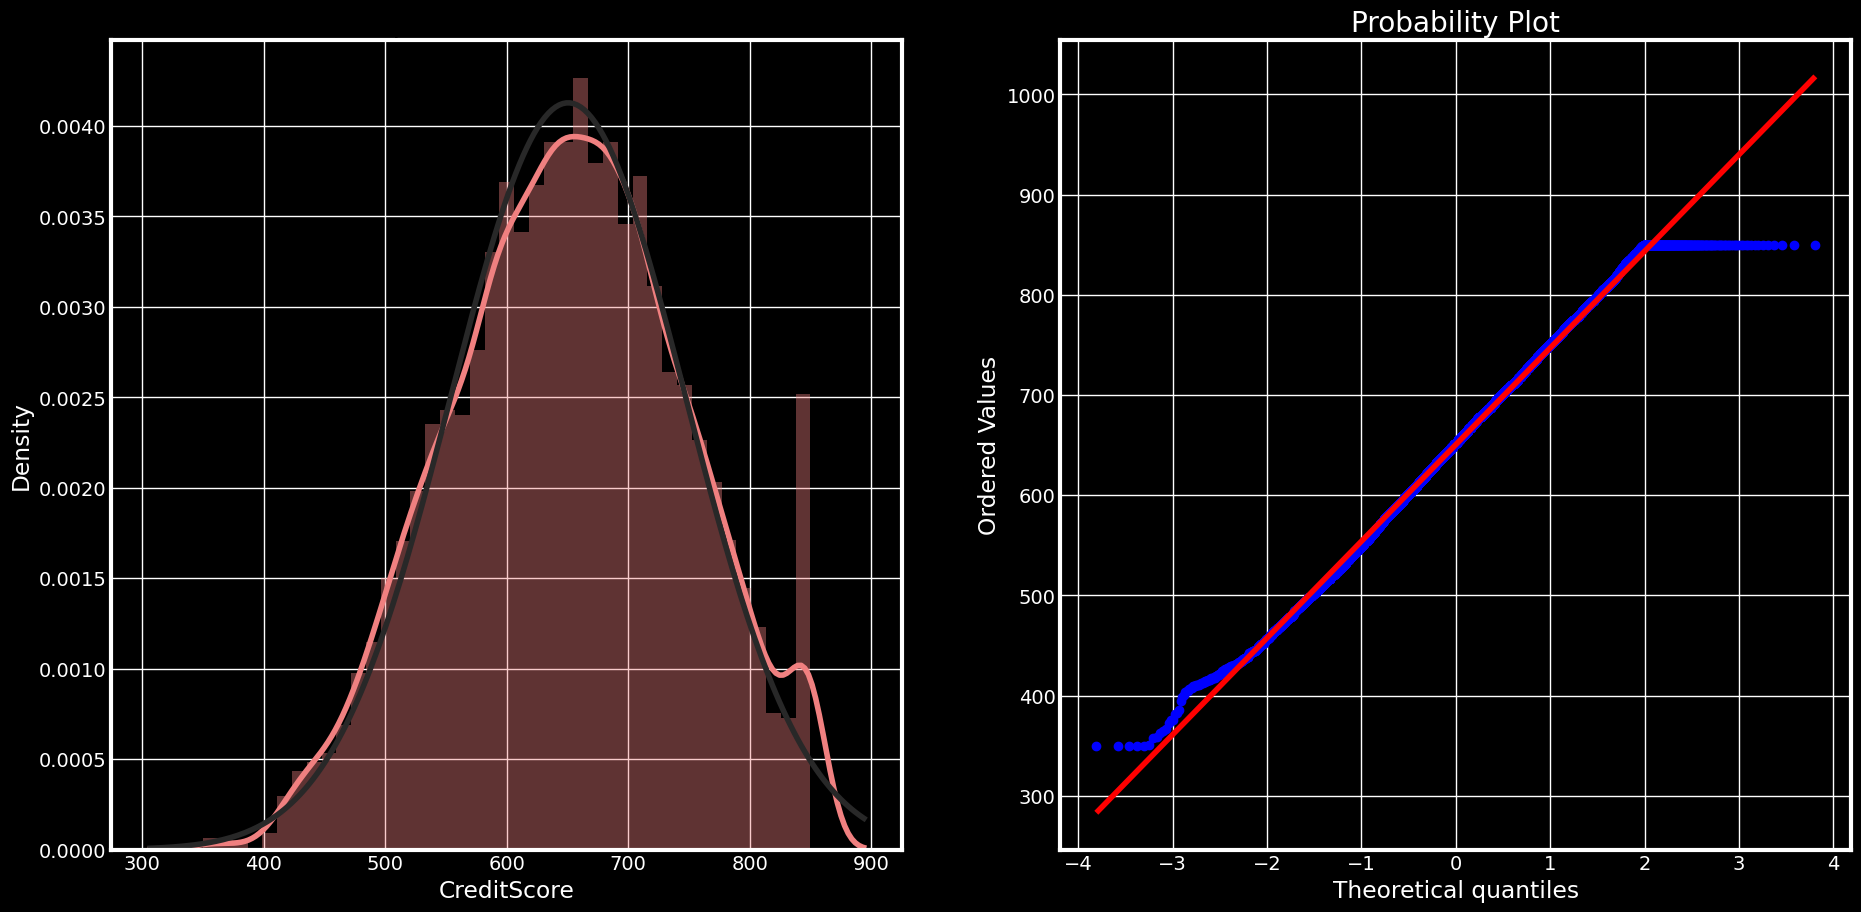

After Correcting
Mu after correcting Creditscore : 1329.0659455133032, Sigma after correcting Creditscore : 222.3060808839672


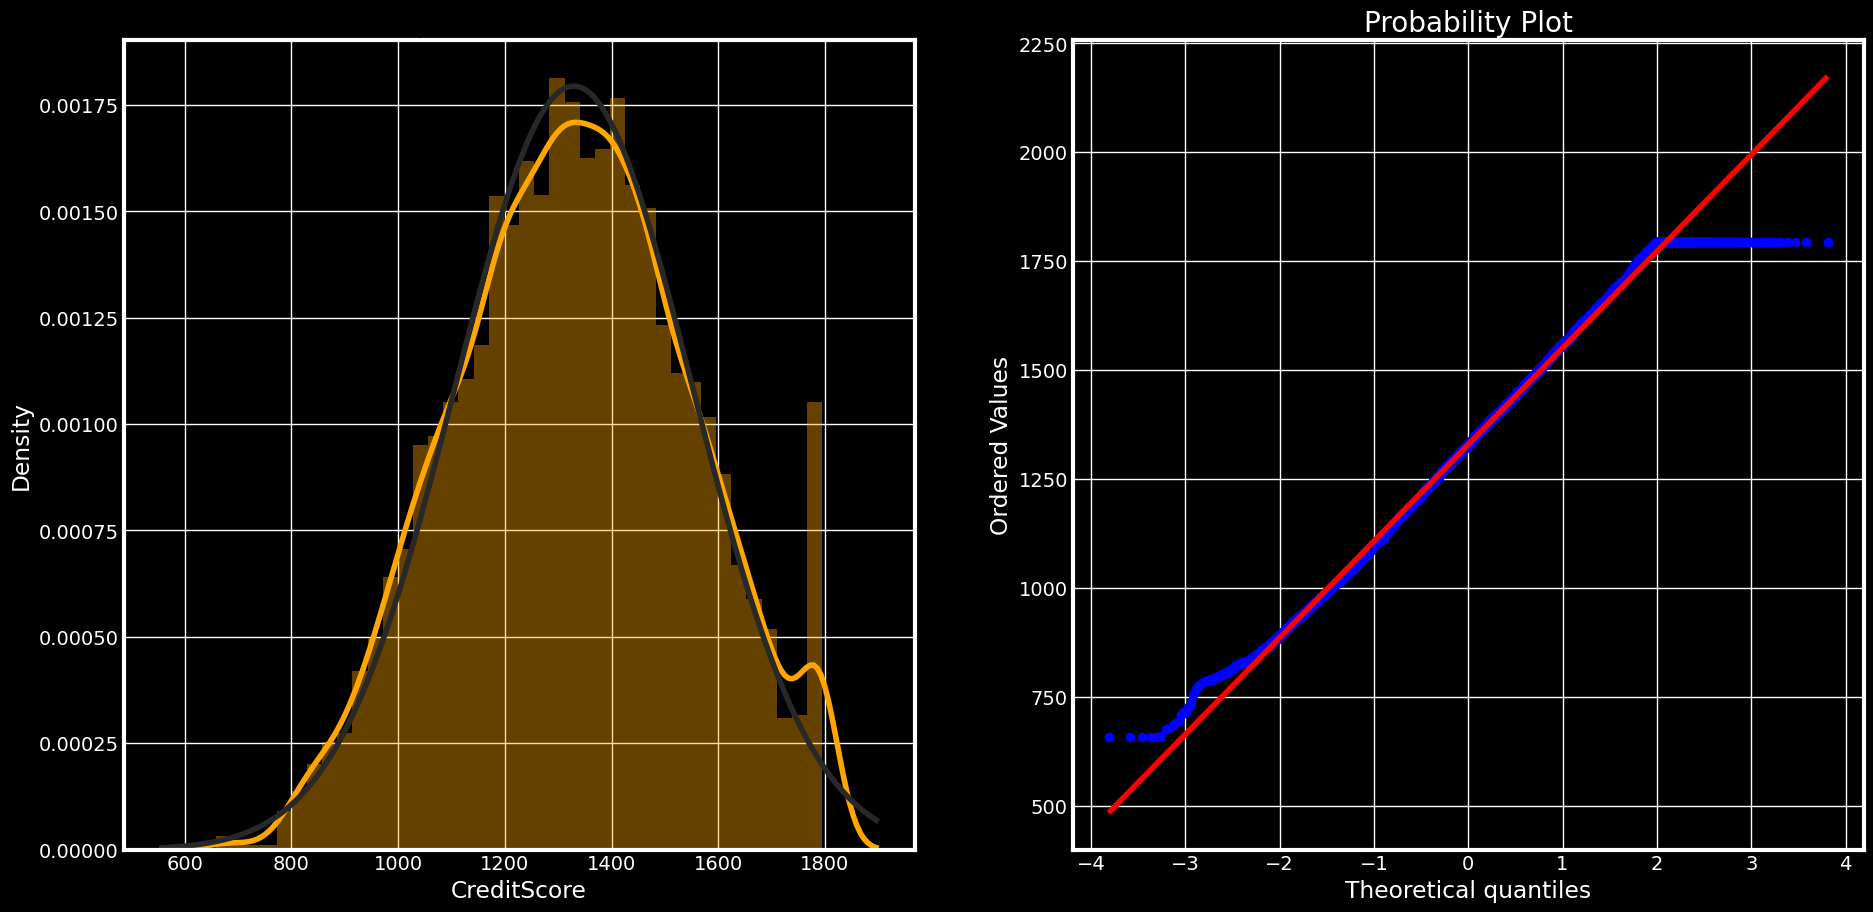

Before Correcting
Mu before correcting Age : 38.9218, Sigma before correcting Age : 10.487282048271611


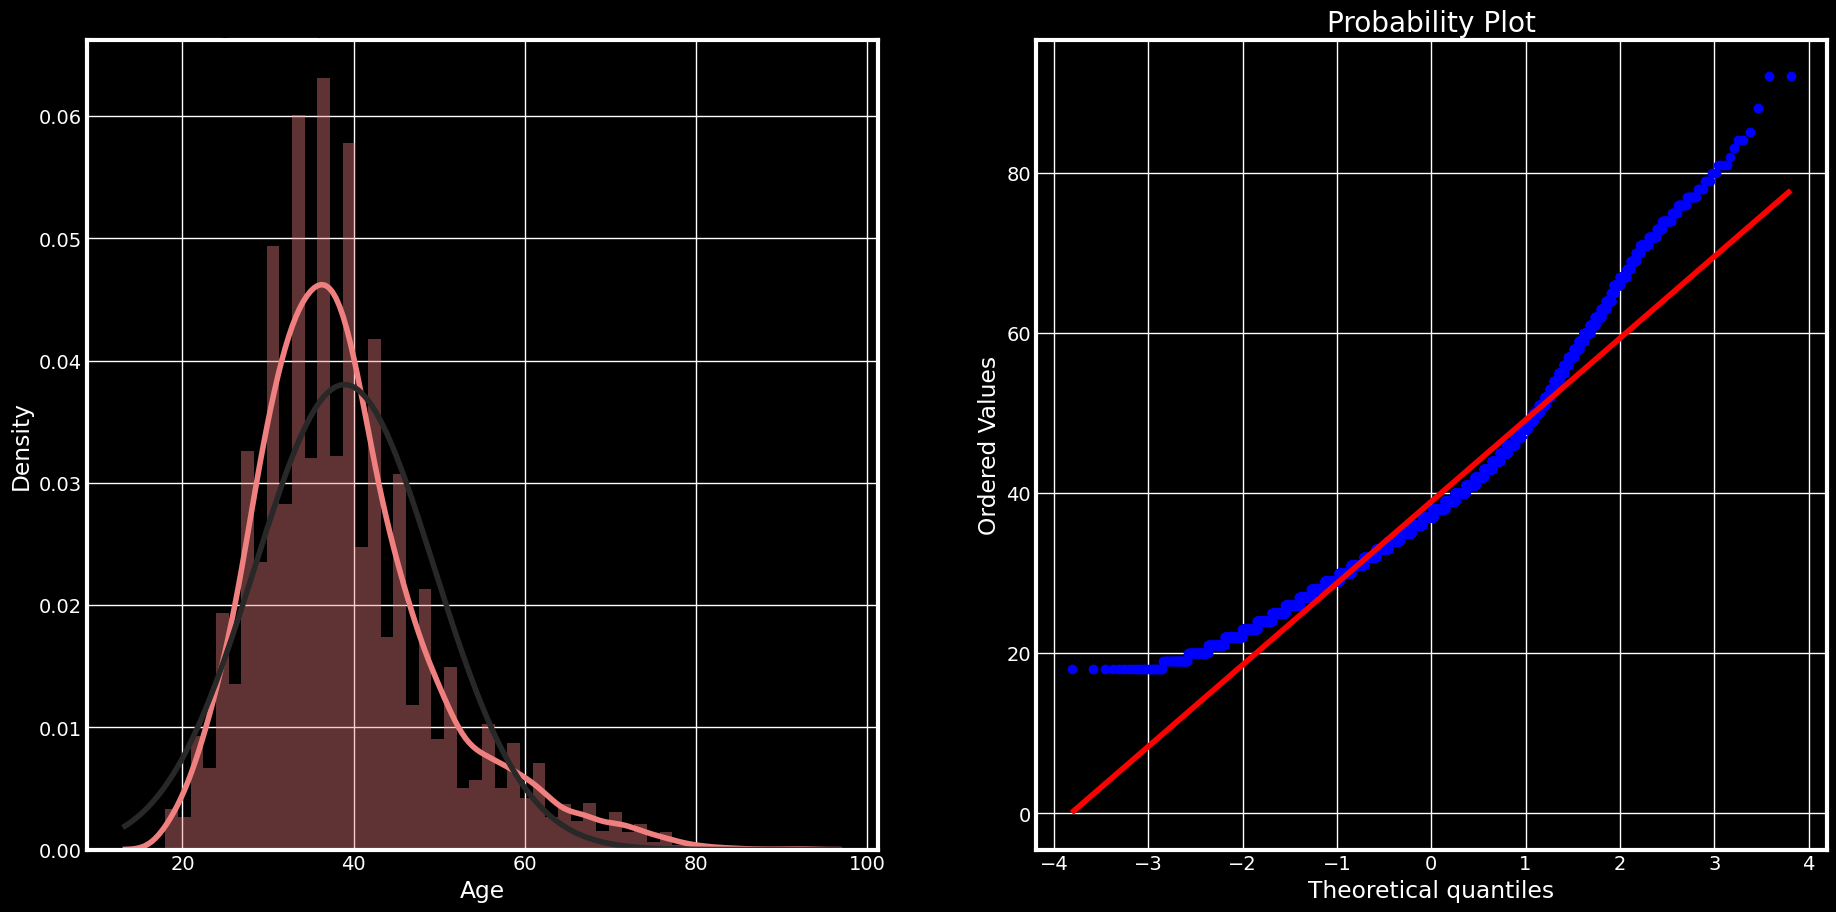

After Correcting
Mu after correcting Age : 2.4793629709576757, Sigma after correcting Age : 0.11426409757988319


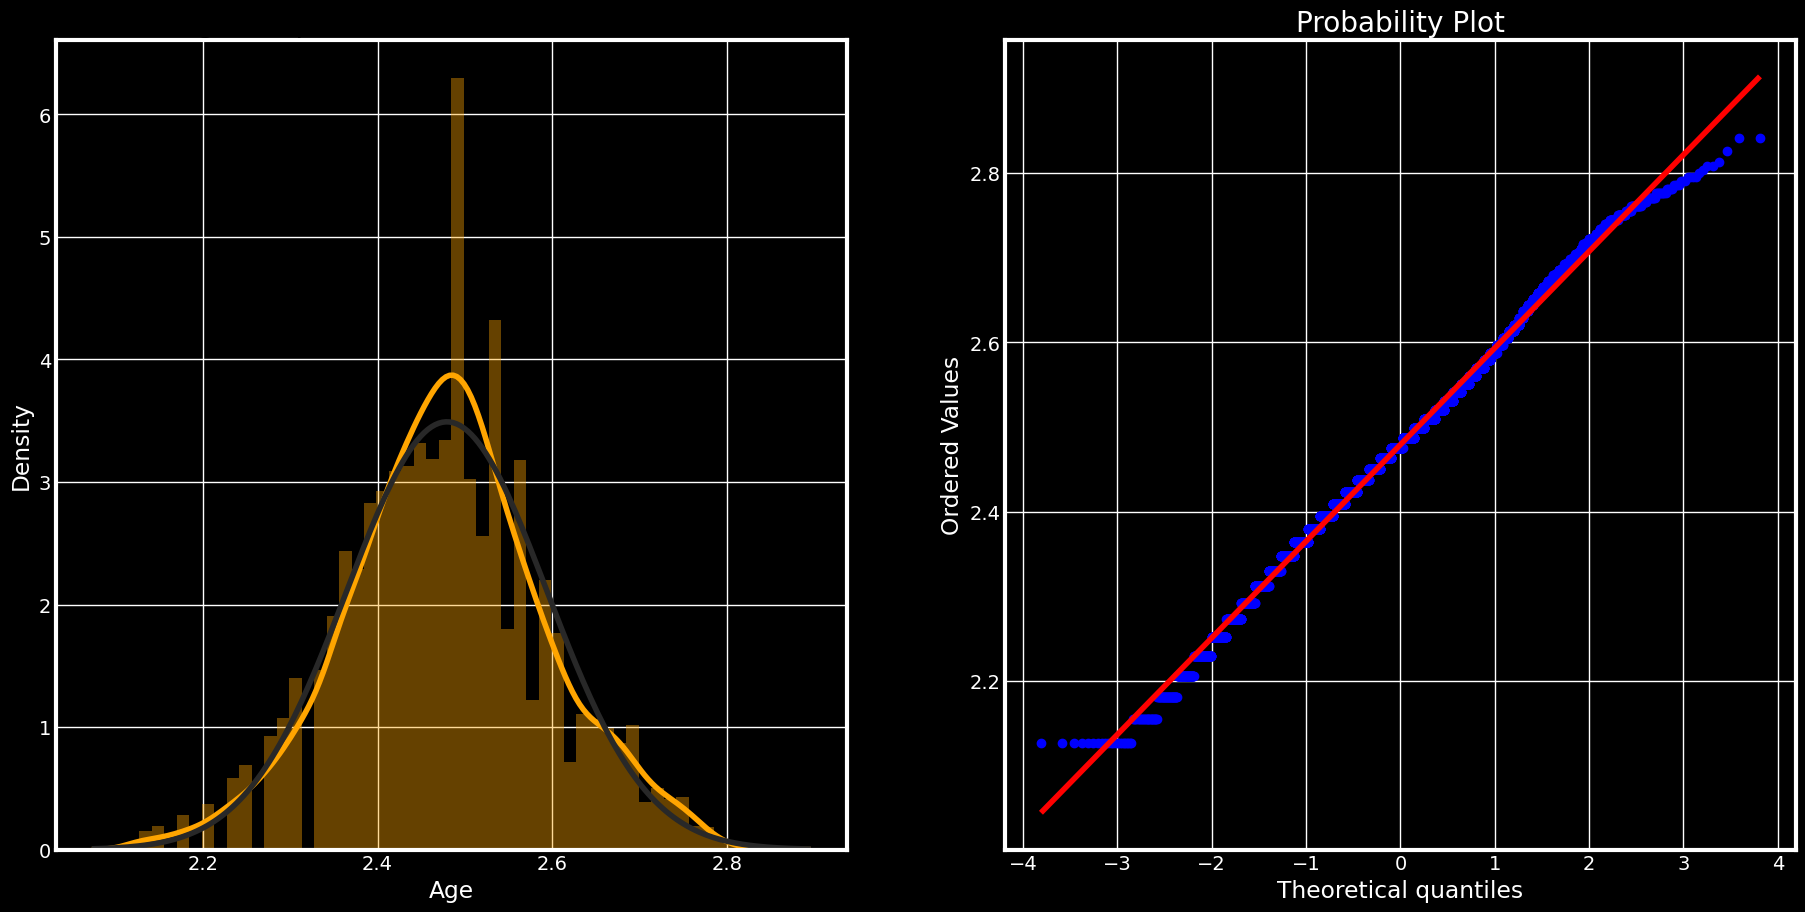

Before Correcting
Mu before correcting Estimatedsalary : 100090.239881, Sigma before correcting Estimatedsalary : 57507.617221165565


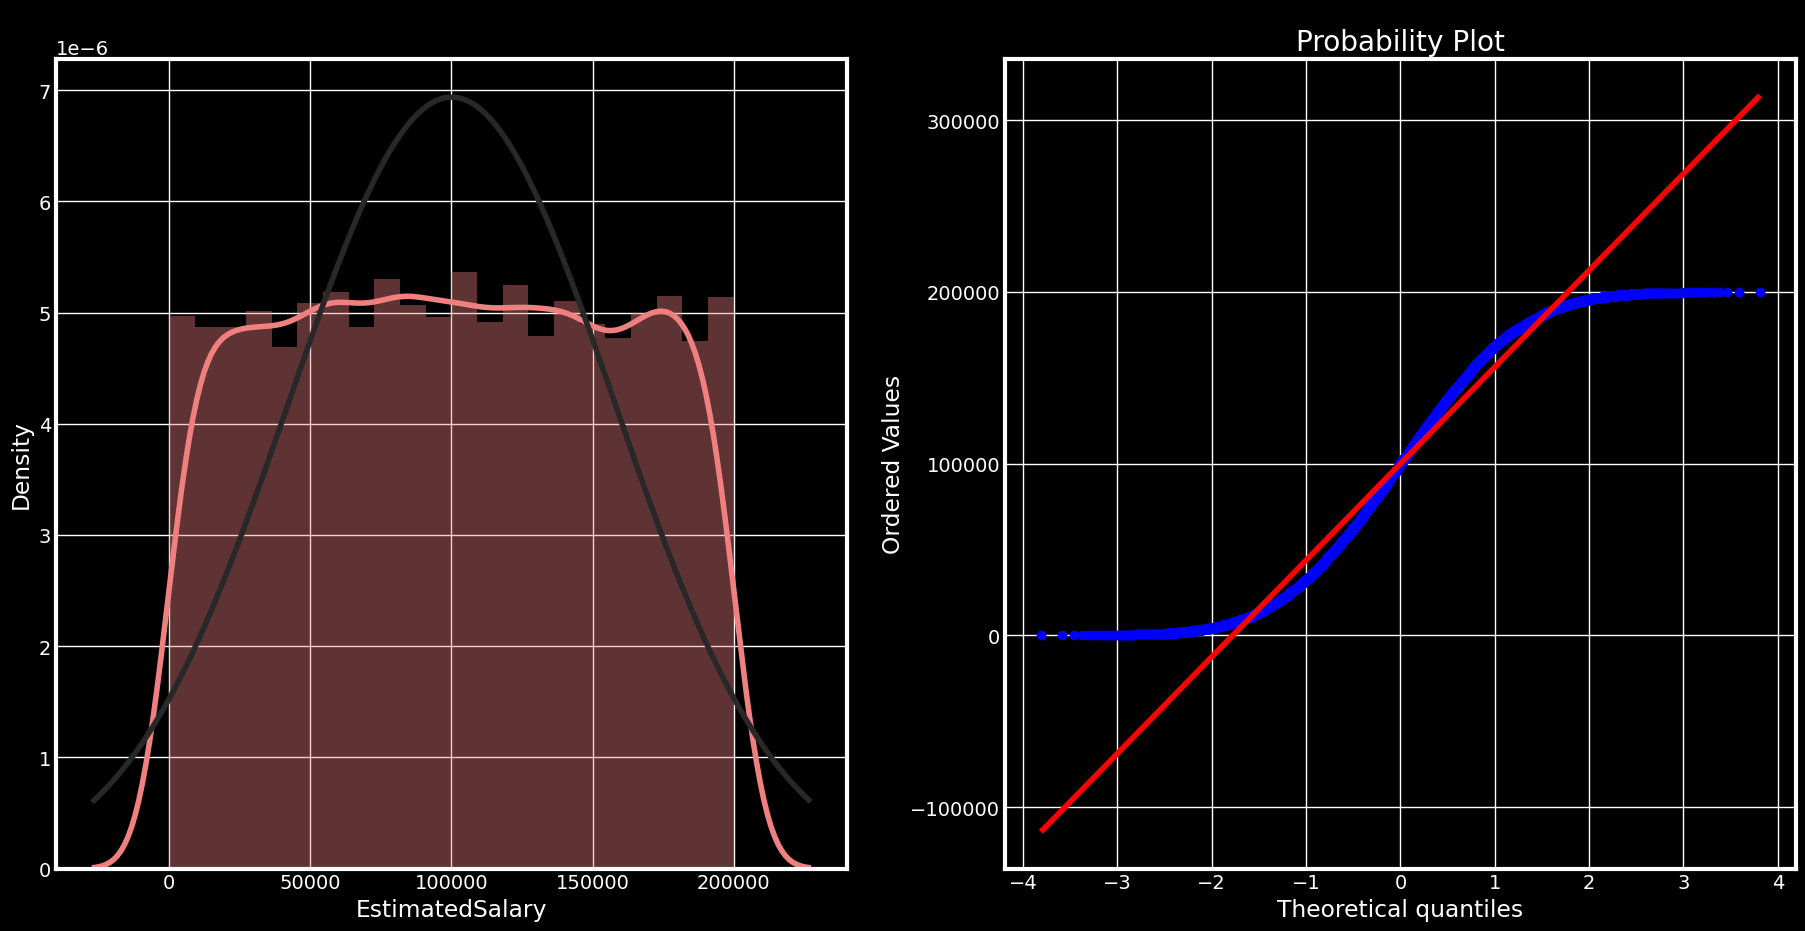

After Correcting
Mu after correcting Estimatedsalary : 4887.519664509259, Sigma after correcting Estimatedsalary : 2224.789051923219


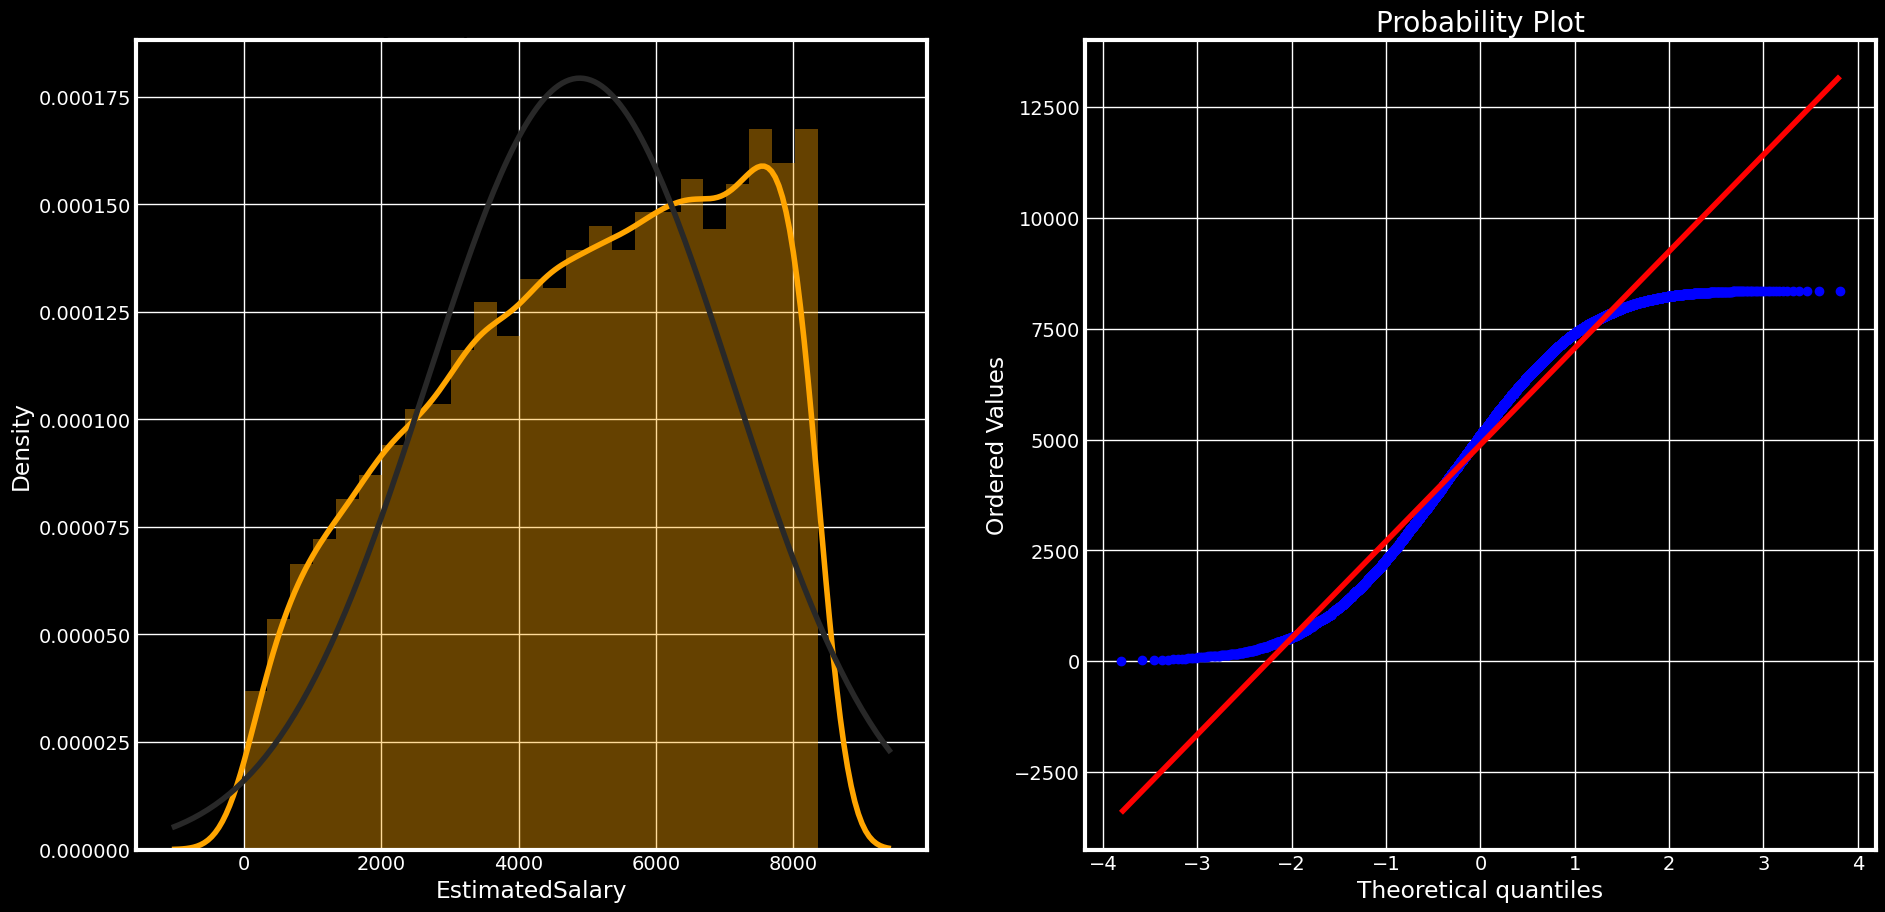

In [15]:
skewed_columns = ['CreditScore', 'Age', 'EstimatedSalary']
for column in skewed_columns:
    skewnessCorrector(df,column)

In [16]:
X = df.iloc[:, 3:-1].drop(['Geography', 'Gender'], axis=1)
y = df.iloc[:, -1]

In [17]:
print(X)

      CreditScore       Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0     1254.494736  2.530867       2       0.00              1          1   
1     1229.340250  2.520415       1   83807.86              1          0   
2      990.092962  2.530867       8  159660.80              3          1   
3     1439.118270  2.498541       1       0.00              2          0   
4     1794.883855  2.541019       2  125510.82              1          1   
...           ...       ...     ...        ...            ...        ...   
9995  1607.636930  2.498541       5       0.00              2          1   
9996  1021.346573  2.450364      10   57369.61              1          1   
9997  1462.395062  2.463018       7       0.00              1          0   
9998  1609.992235  2.530867       3   75075.31              2          1   
9999  1657.180322  2.347250       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  
0                  1      5151.740581  
1      

In [18]:
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


In [19]:
classifier = Classification(predictor = ['all'])
classifier.fit(X, y)


          
██╗░░░░░██╗░░░██╗░█████╗░██╗███████╗███████╗██████╗░░░░░░░███╗░░░███╗██╗░░░░░
██║░░░░░██║░░░██║██╔══██╗██║██╔════╝██╔════╝██╔══██╗░░░░░░████╗░████║██║░░░░░
██║░░░░░██║░░░██║██║░░╚═╝██║█████╗░░█████╗░░██████╔╝█████╗██╔████╔██║██║░░░░░
██║░░░░░██║░░░██║██║░░██╗██║██╔══╝░░██╔══╝░░██╔══██╗╚════╝██║╚██╔╝██║██║░░░░░
███████╗╚██████╔╝╚█████╔╝██║██║░░░░░███████╗██║░░██║░░░░░░██║░╚═╝░██║███████╗
╚══════╝░╚═════╝░░╚════╝░╚═╝╚═╝░░░░░╚══════╝╚═╝░░╚═╝░░░░░░╚═╝░░░░░╚═╝╚══════╝
 

Started LuciferML [ ✓ ]

Preprocessing Started [*]

Preprocessing Done [ ✓ ]

Training LuciferML [*]

Training Done [ ✓ ]

Results Below



,Name,Accuracy,KFold Accuracy,Model
0,Logistic Regression,81.55,81.3750,LogisticRegression()
1,Stochastic Gradient Descent,80.45,79.4875,SGDClassifier()
2,Perceptron,63.65,72.2125,Perceptron()
3,Passive Aggressive Classifier,80.25,73.2000,PassiveAggressiveClassifier()
4,Ridge Classifier,81.00,80.4000,RidgeClassifier()
5,Support Vector Machine,85.25,85.1875,SVC()
6,K-Nearest Neighbours,84.40,83.4125,KNeighborsClassifier()
7,Decision Trees,77.20,77.2375,DecisionTreeClassifier()
8,Naive Bayes,83.75,83.4250,GaussianNB()
9,Random Forest Classifier,86.20,85.1625,"(DecisionTreeClassifier(max_features='sqrt', r..."



Completed LuciferML Run [ ✓ ]

Saved Best Model to lucifer_ml_info/best/classifier/models/Gradient_Boosting_Classifier_1682330353.pkl and its scaler to lucifer_ml_info/best/classifier/scalers/Gradient_Boosting_Classifier_Scaler_1682330353.pkl 

Time Elapsed :  268.75 seconds 



In [20]:
result = classifier.result_df
result = result.sort_values(by = 'KFold Accuracy', ascending = False).reset_index(drop = True)
result.iloc[0]

Name                                   Gradient Boosting Classifier
Accuracy                                                       86.2
KFold Accuracy                                              85.7375
Model             ([DecisionTreeRegressor(criterion='friedman_ms...
Name: 0, dtype: object

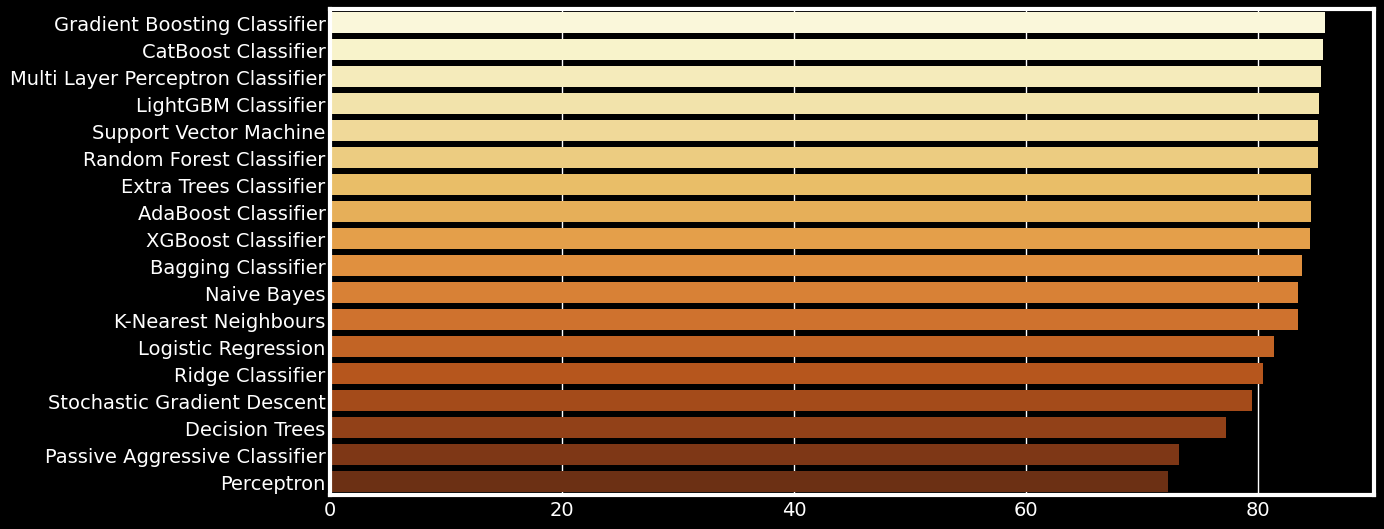

In [21]:
fig = plt.figure(figsize=(12, 6))
model_accuracies = list(result['KFold Accuracy'].values)
model_names = list(result['Name'].values)
sns.barplot(x=model_accuracies, y=model_names, palette='YlOrBr');